<a href="https://colab.research.google.com/github/Kanabu1/plant--disease-detection/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# data preprocessiing
color = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 54335 files belonging to 38 classes.


In [3]:
for images, labels in color.take(1):
  print(images.shape)
  print(labels.shape)

(16, 128, 128, 3)
(16, 38)


In [4]:
len(color)

3396

In [5]:
#split the data
train_ds = color.skip(200)
val_ds = color.take(100)
test_ds = color.take(100)

In [6]:
 #build deep learning model
 model = Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(38, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#train
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 3061s 903ms/step - accuracy: 0.5080 - loss: 3.4798 - val_accuracy: 0.8019 - val_loss: 0.6352
Epoch 2/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1834s 569ms/step - accuracy: 0.8221 - loss: 0.5706 - val_accuracy: 0.8306 - val_loss: 0.5799
Epoch 3/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1804s 559ms/step - accuracy: 0.8791 - loss: 0.3873 - val_accuracy: 0.8531 - val_loss: 0.5300
Epoch 4/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1761s 547ms/step - accuracy: 0.9134 - loss: 0.2775 - val_accuracy: 0.8719 - val_loss: 0.4838
Epoch 5/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1771s 550ms/step - accuracy: 0.9278 - loss: 0.2380 - val_accuracy: 0.8775 - val_loss: 0.5871
Epoch 6/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1773s 550ms/step - accuracy: 0.9442 - loss: 0.1941 - val_accuracy: 0.8750 - val_loss: 0.5629
Epoch 7/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1770s 549ms/step - accuracy: 0.9441 - loss: 0.1970 - val_accuracy: 0.8681 - val_loss: 0.7105
Epoch 8/10
3196/3196 ━━━━━━━━━━━━━━━━━━━━ 1755s 545ms/s

In [11]:
#evaluate performance
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)

100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.8418 - loss: 1.1258
Test accuracy: 0.8506249785423279


In [12]:
history.history

{'accuracy': [0.6573775410652161,
  0.8386623859405518,
  0.8881783485412598,
  0.9180796146392822,
  0.9309670329093933,
  0.9436589479446411,
  0.9477852582931519,
  0.9501124620437622,
  0.9563312530517578,
  0.9584824442863464],
 'loss': [1.4398361444473267,
  0.509559690952301,
  0.35513967275619507,
  0.26695266366004944,
  0.22958536446094513,
  0.1967933028936386,
  0.18644973635673523,
  0.18525928258895874,
  0.17349962890148163,
  0.1722451001405716],
 'val_accuracy': [0.8018749952316284,
  0.8306249976158142,
  0.8531249761581421,
  0.871874988079071,
  0.8774999976158142,
  0.875,
  0.8681250214576721,
  0.8456249833106995,
  0.8918750286102295,
  0.8537499904632568],
 'val_loss': [0.6351760625839233,
  0.5798999667167664,
  0.530045747756958,
  0.48376816511154175,
  0.5871013402938843,
  0.5628653764724731,
  0.7104505300521851,
  0.9666909575462341,
  0.7635754346847534,
  1.1109516620635986]}

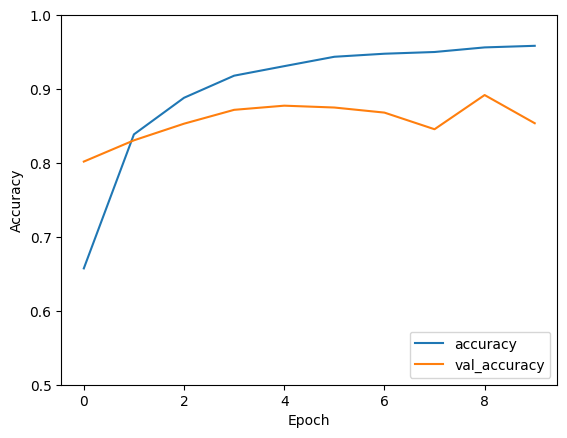

In [17]:
#plot performance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [19]:
#print the recall and precision of the test partition
y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)

y_true = []
for images, labels in test_ds:
    for label in labels:
        y_true.append(np.argmax(label))

test_recall = tf.keras.metrics.Recall()
test_recall.update_state(y_true, y_pred)
test_recall = test_recall.result().numpy()

test_precision = tf.keras.metrics.Precision()
test_precision.update_state(y_true, y_pred)
test_precision = test_precision.result().numpy()


test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
print('Test recall:', test_recall)
print('Test precision:', test_precision)

100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.8483 - loss: 1.0407
Test accuracy: 0.8525000214576721
Test loss: 1.074894905090332
Test recall: 0.9790875
Test precision: 0.98659


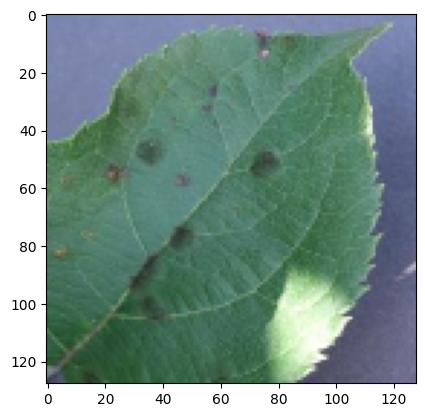

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[1.0000000e+00 6.8829533e-35 3.5539007e-33 8.4838570e-10 1.3553956e-28
  4.3242621e-14 1.1406998e-29 2.0905230e-17 1.0066701e-17 7.5455093e-18
  1.4306536e-15 4.8664878e-34 2.5550153e-35 7.5885772e-33 1.2909672e-27
  8.2694617e-27 1.9907885e-21 0.0000000e+00 4.4451987e-31 1.6551422e-23
  2.1678718e-16 3.7998132e-14 0.0000000e+00 2.8311233e-35 6.3779728e-18
  3.2287045e-15 3.7861924e-28 7.5725724e-29 4.1693369e-23 2.2686330e-19
  7.3209119e-21 2.5091670e-18 6.0878857e-23 0.0000000e+00 3.3779126e-31
  2.9598571e-36 0.0000000e+00 3.5576318e-25]]


In [20]:
#testing on new data
import cv2

image_path = '/content/drive/MyDrive/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128))
image = np.expand_dims(image, axis=0)

plt.imshow(image[0])
plt.show()

prediction = model.predict(image)
print(prediction)

#

In [21]:
# displaying the disease prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predicted_class = np.argmax(predictions[0])
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
0


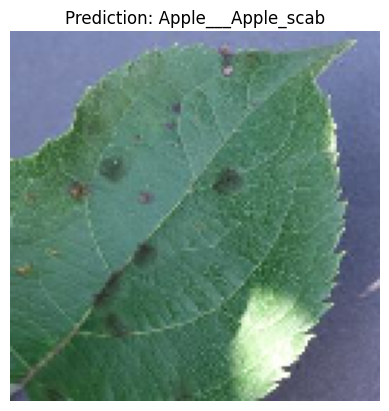

In [26]:
#displaying the disease prediction
class_name = color.class_names
# print(class_name)

model_prediction = class_name[predicted_class]
plt.imshow(image)
plt.title(f'Prediction: {model_prediction}')
plt.axis('off')
plt.show()

In [27]:
#save model
model.save('color_model.keras')